In [2]:
import pandas as pd
df = pd.read_csv("raw_data_P1.csv")
df.shape

(2489, 10)

In [3]:
#Kiểm tra các cột có dữ liệu dạng số
df.select_dtypes(include=["float64", "int64"])

,Diện tích (m2),Giấy tờ pháp lý,Số phòng ngủ,Số phòng vệ sinh
0,44.0,1,2.0,1.0
1,63.0,6,2.0,2.0
2,70.0,6,2.0,2.0
3,45.0,1,3.0,5.0
4,42.0,1,3.0,NaN
...,...,...,...,...
2484,31.0,1,6.0,NaN
2485,193.0,6,4.0,3.0
2486,100.0,1,NaN,NaN
2487,142.0,6,3.0,3.0


In [4]:
# Loại bỏ ký tự không phải số (ví dụ: dấu phẩy, khoảng trắng)
df["Giá (VND)"] = df["Giá (VND)"].astype(str).str.replace(r"[^0-9.]", "", regex=True)

# Chuyển sang kiểu float (ép lỗi thành NaN nếu gặp chuỗi không hợp lệ)
df["Giá (VND)"] = pd.to_numeric(df["Giá (VND)"], errors="coerce")

# Kiểm tra lại kiểu dữ liệu sau khi chuyển
print(df[["Giá (VND)"]].dtypes)

Giá (VND)    int64
dtype: object


In [5]:
# Kiểm tra lại toàn bộ file dữ liệu xem còn bao nhiêu giá trị NaN
df.isna().sum()

,0
chỉNgày đăng,0
Loại hình căn hộ,0
Diện tích (m2),0
Giá (VND),0
Giấy tờ pháp lý,0
Số phòng ngủ,305
Số phòng vệ sinh,1017
Tình trạng nội thất,0
Tiêu đề,0
Địa chỉ,0


In [6]:
#Kiểm tra xem có bao nhiêu bản ghi chứa dữ liệu NaN ở loại hình "Đất"
dat_df = df[df["Loại hình căn hộ"].str.contains("đất", case=False, na=False)]
dat_df.shape

(289, 10)

In [7]:
# Xử lý giá trị khuyết thiếu cho cột "Số phòng ngủ" và "Số phòng vệ sinh" khi loại hình căn hộ là "đất"
mask = df["Loại hình căn hộ"].astype(str).str.lower() == "đất"
df.loc[mask, ["Số phòng ngủ", "Số phòng vệ sinh"]] = 0

In [8]:
# Kiểm tra xem trong các dòng loại "Đất" còn NaN ở 2 cột không
mask = df["Loại hình căn hộ"].astype(str).str.lower().str.contains("đất", na=False)
nan_check = df.loc[mask, ["Số phòng ngủ", "Số phòng vệ sinh"]].isna().sum()
print(nan_check)

Số phòng ngủ        0
Số phòng vệ sinh    0
dtype: int64


In [9]:
#Kiểm tra lại toàn bộ file dữ liệu xem còn bao nhiêu giá trị NaN
df.isna().sum()

,0
chỉNgày đăng,0
Loại hình căn hộ,0
Diện tích (m2),0
Giá (VND),0
Giấy tờ pháp lý,0
Số phòng ngủ,16
Số phòng vệ sinh,728
Tình trạng nội thất,0
Tiêu đề,0
Địa chỉ,0


In [10]:
#Tìm các cột dữ liệu dạng số có chứa missing data còn lại
numeric_cols = df.select_dtypes("float").columns.tolist()

df[numeric_cols].isna().sum()

,0
Diện tích (m2),0
Số phòng ngủ,16
Số phòng vệ sinh,728


In [11]:
#Điền các giá trị khuyết thiếu bằng median
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

df[numeric_cols].isna().sum()/len(df)

/tmp/ipython-input-2439424278.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


,0
Diện tích (m2),0.0
Số phòng ngủ,0.0
Số phòng vệ sinh,0.0


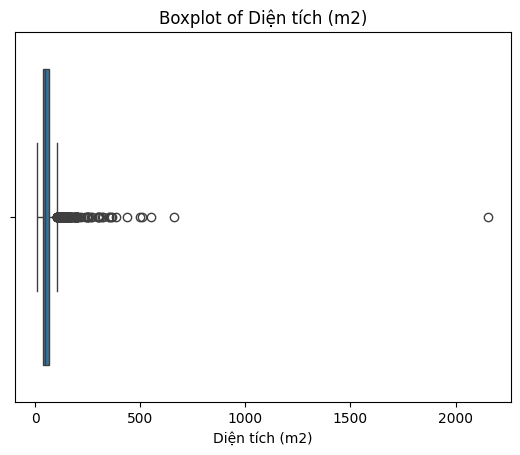

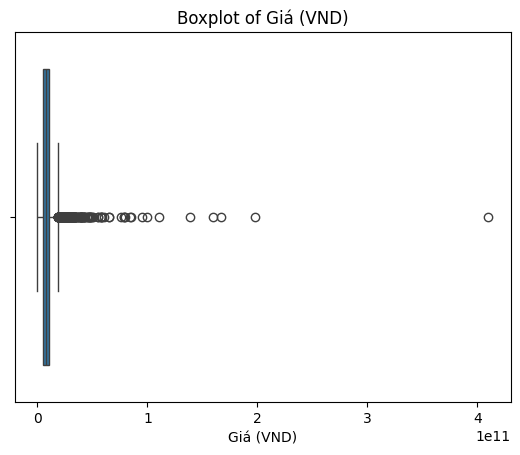

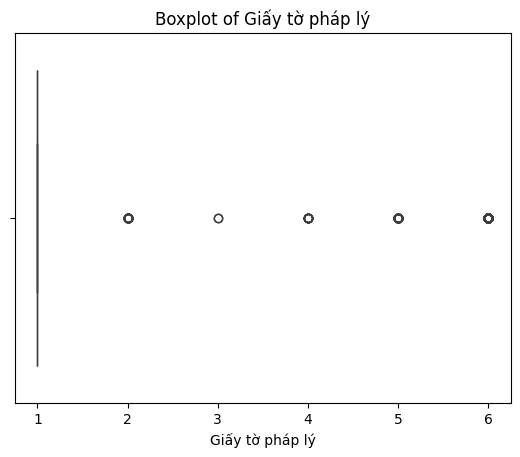

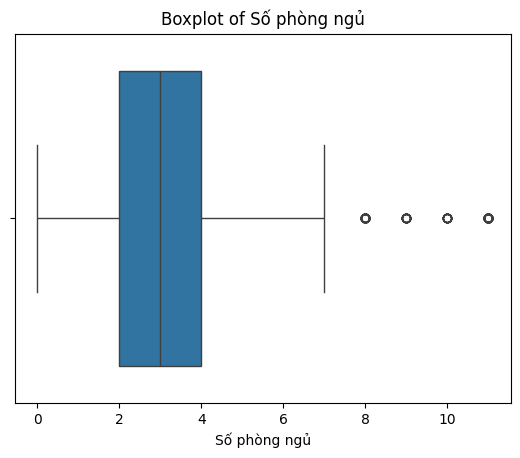

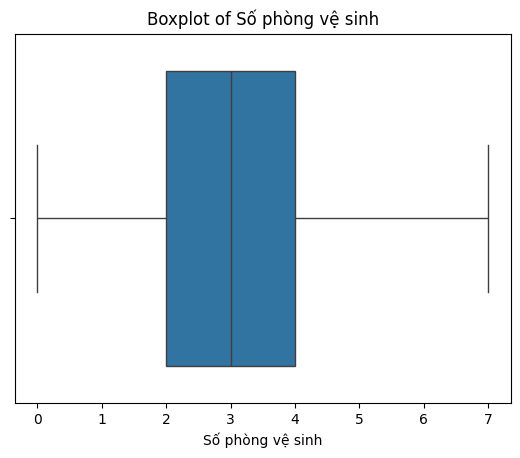

In [12]:
#Vẽ boxplot cho các cột dữ liệu dạng số
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

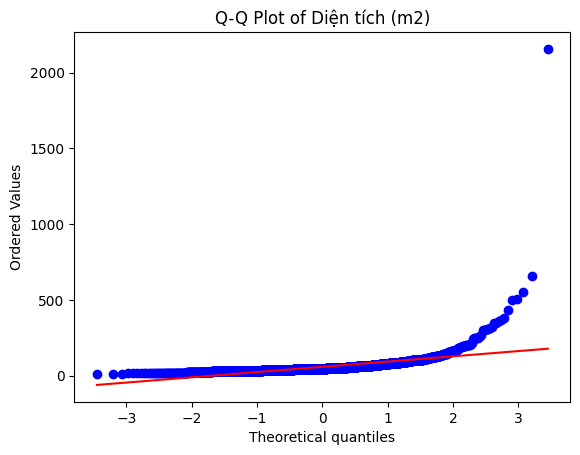

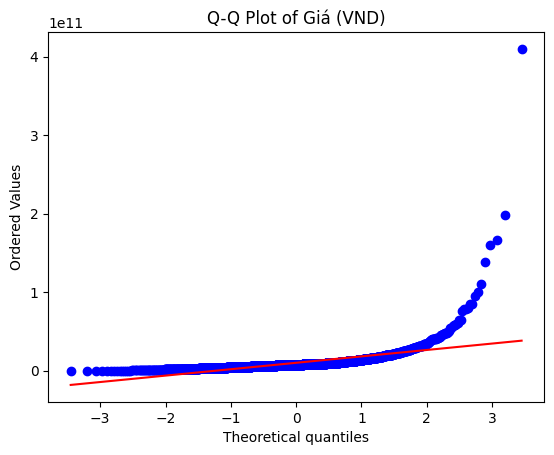

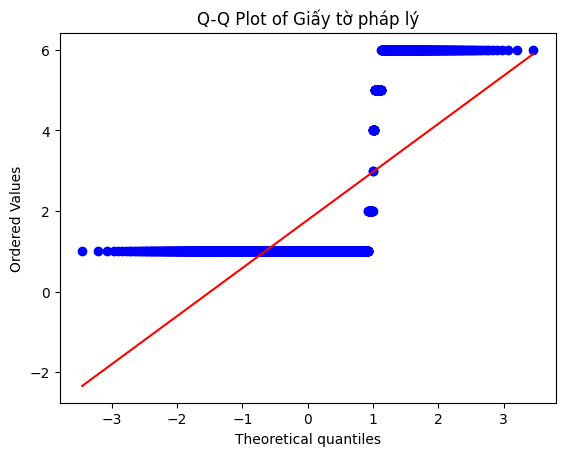

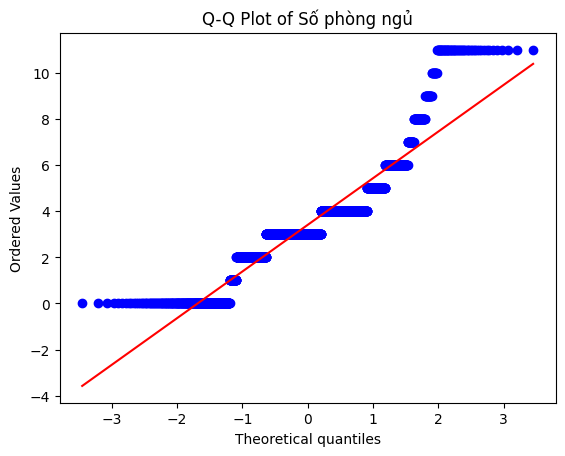

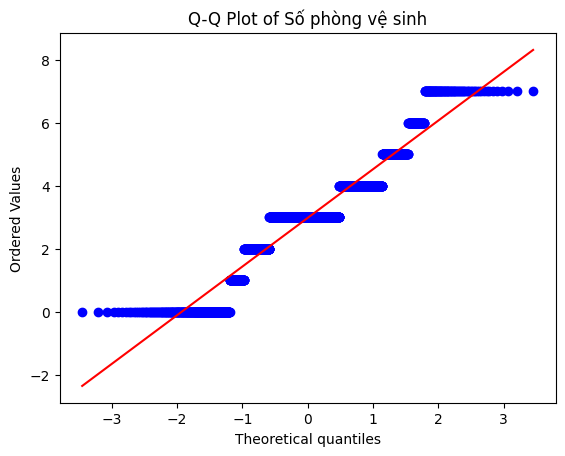

In [ ]:
#Kiểm tra phân phối dữ liệu
import scipy.stats as stats
for col in numeric_cols:
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {col}")
    plt.show()

In [13]:
# Phát hiện các điểm dữ liệu outliers trong các cột dữ liệu dạng số sử dụng IQR
def detect_outliers(df):
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
    outlier_indices = set()
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        min_whisker = Q1 - 1.5*IQR
        max_whisker = Q3 + 1.5*IQR
        outliers = df[(df[col]<min_whisker) | (df[col]>max_whisker)].index
        outlier_indices.update(outliers)
    return list(outlier_indices)

In [14]:
# Gọi hàm phát hiện outliers
outlier_indices = detect_outliers(df)

# In ra toàn bộ các dòng bị xem là ngoại lai
print(df.loc[outlier_indices])

             chỉNgày đăng Loại hình căn hộ  Diện tích (m2)    Giá (VND)  \
1     13/10/2025 14:21:27  Căn hộ/Chung cư            63.0   4400000000   
2     13/10/2025 14:18:42  Căn hộ/Chung cư            70.0   5550000000   
2051  11/10/2025 00:36:02            Nhà ở            60.0  39000000000   
2052  11/10/2025 00:34:22  Căn hộ/Chung cư            50.0   4600000000   
6     13/10/2025 14:15:12              Đất           120.0   7400000000   
...                   ...              ...             ...          ...   
2024  11/10/2025 01:09:11            Nhà ở            50.0   8600000000   
2025  11/10/2025 01:06:20            Nhà ở            60.0  21500000000   
2035  11/10/2025 00:56:32            Nhà ở            98.5  34000000000   
2036  11/10/2025 00:56:14            Nhà ở            32.0  22000000000   
2045  11/10/2025 00:39:33            Nhà ở           120.0   7500000000   

      Giấy tờ pháp lý  Số phòng ngủ  Số phòng vệ sinh Tình trạng nội thất  \
1                   6 

In [ ]:
for col in df.select_dtypes(["float", "int64"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    min_whisker = Q1 - 1.5 * IQR
    max_whisker = Q3 + 1.5 * IQR
    median = df[col].median()

    df.loc[(df[col] < min_whisker) | (df[col] > max_whisker), col] = median

In [ ]:
#Kiểm tra lại sau khi đã xử lý ngoại lai bằng median
outlier_indices_after = detect_outliers(df)

if len(outlier_indices_after) == 0:
    print("Dữ liệu không còn giá trị ngoại lai.")
else:
    print(f"Vẫn còn {len(outlier_indices_after)} giá trị ngoại lai.")

Vẫn còn 287 giá trị ngoại lai.


In [15]:
for col in df.select_dtypes(["float", "int64"]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    min_whisker = Q1 - 1.5 * IQR
    max_whisker = Q3 + 1.5 * IQR
    mean = df[col].mean()

    df.loc[(df[col] < min_whisker) | (df[col] > max_whisker), col] = mean

/tmp/ipython-input-3102591303.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10154341473.224186' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] < min_whisker) | (df[col] > max_whisker), col] = mean
/tmp/ipython-input-3102591303.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.7778224186420248' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] < min_whisker) | (df[col] > max_whisker), col] = mean


In [16]:
#Kiểm tra lại sau khi đã xử lý ngoại lai bằng mean
outlier_indices_after = detect_outliers(df)

if len(outlier_indices_after) == 0:
    print("Dữ liệu không còn giá trị ngoại lai.")
else:
    print(f"Vẫn còn {len(outlier_indices_after)} giá trị ngoại lai.")

Vẫn còn 522 giá trị ngoại lai.
